# 3. WordCloud y Estadistica

In [108]:
import datasets # Biblioteca de manejo de conjuntos de datos para procesamiento de lenguaje natural
import mae2 # Biblioteca del curso donde iremos guardando funciones importantes
import collections # Módulo de tipos de datos adicionales de Python
import itertools # Módulo de herramientas de manejo de iterables
import matplotlib.pyplot as plt # Biblioteca de visualización
import wordcloud # Biblioteca de visualización de nubes de palabras
from wordcloud import WordCloud
import spacy.lang.es # Biblioteca de procesamiento de lenguaje natural
import PIL # Biblioteca de manejo de imágenes
import numpy as np # Biblioteca de manejo de datos vectoriales
import nltk
from nltk.text import Text


## WordCloud 

Es una representación visual de palabras en la que el tamaño de cada palabra se basa en su frecuencia o importancia en un texto o conjunto de textos. Las palabras más frecuentes o relevantes se muestran en un tamaño de fuente más grande y se agrupan de manera visualmente atractiva. Las WordClouds son utilizadas para resumir y visualizar patrones de palabras clave en un corpus de texto y facilitar la identificación de temas o conceptos prominentes.

In [109]:
text = "El curso de NLP clínico está super interesante! Aprendemos muchas técnicas en el curso de NLP clínico. Además, el contenido del curso de NLP clínico es muy relevante y práctico."

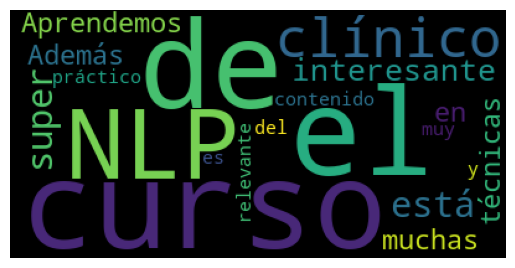

In [110]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Funcionó, pero igual es feo :P

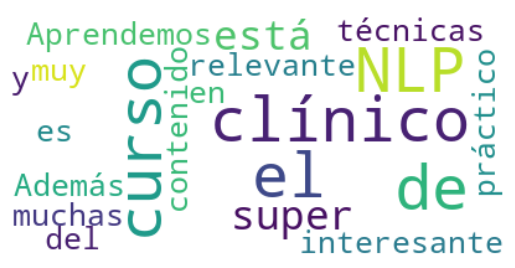

In [111]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Y se pueden hacer nubes con formas también: https://www.datacamp.com/community/tutorials/wordcloud-python.
Estas nubes son más interesantes con textos más grandes. 

In [ ]:
#nltk.download('gutenberg')

In [112]:
macbeth = Text(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))

In [113]:
palabras = nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')
palabras

"[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap. 

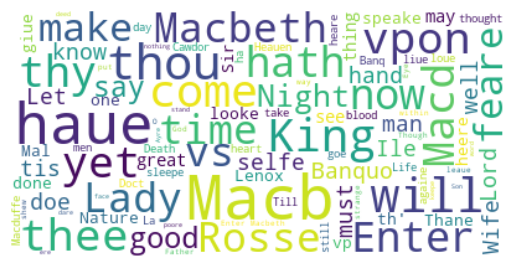

In [114]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(palabras)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Estadistica

Cargaremos y analizaremos nuestro conjunto de datos y lo compararemos con otro de opiniones de películas.

In [115]:
spanish_diagnostics = datasets.load_dataset('fvillena/spanish_diagnostics', split="train+test") # Cargamos las particiones de entrenamiento y prueba

Found cached dataset spanish_diagnostics (/home/vscode/.cache/huggingface/datasets/fvillena___spanish_diagnostics/default/0.0.0/45c176cea64580ea9631f78c2867a657ede368597681e5337e9f1c976e4e84ff)


In [116]:
spanish_diagnostics

Dataset({
    features: ['text', 'label'],
    num_rows: 100000
})

Esta es una de las instancias de nuestro conjunto de datos.

In [117]:
spanish_diagnostics[2]["text"]

'Perturbación de la actividad y de la atención Trastorno defícit atencional'

Normalizaremos nuestro texto con la función que programamos la clase anterior y tokenizaremos el texto mediante espacio.

In [118]:
spanish_diagnostics_normalized = spanish_diagnostics.map(
    lambda x: { 
        "normalized_text" : mae2.normalize(x["text"]) 
    })

Loading cached processed dataset at /home/vscode/.cache/huggingface/datasets/fvillena___spanish_diagnostics/default/0.0.0/45c176cea64580ea9631f78c2867a657ede368597681e5337e9f1c976e4e84ff/cache-8281a6790ebbb1a5.arrow


In [119]:
spanish_diagnostics_normalized_tokenized = spanish_diagnostics_normalized.map(
    lambda x: { 
        "tokenized_text" : x["normalized_text"].split()
    })

Loading cached processed dataset at /home/vscode/.cache/huggingface/datasets/fvillena___spanish_diagnostics/default/0.0.0/45c176cea64580ea9631f78c2867a657ede368597681e5337e9f1c976e4e84ff/cache-fdb630662624e421.arrow


In [120]:
spanish_diagnostics_normalized_tokenized

Dataset({
    features: ['text', 'label', 'normalized_text', 'tokenized_text'],
    num_rows: 100000
})

In [121]:
spanish_diagnostics_normalized_tokenized["tokenized_text"][:3]

[['anomalias',
  'dentofaciales',
  'incluso',
  'la',
  'maloclusion',
  'discrepancia',
  'dentomaxilar'],
 ['obtruccion', 'fosa', 'nasal', 'derecha'],
 ['perturbacion',
  'de',
  'la',
  'actividad',
  'y',
  'de',
  'la',
  'atencion',
  'trastorno',
  'deficit',
  'atencional']]

El conjunto de datos con el cual nos compararemos es muchocine, el cual consiste en opiniones en español de películas. Lo cargamos y preprocesamos de la misma forma que nuestro conjunto de datos

In [122]:
muchocine = datasets.load_dataset('muchocine', split="train")

Found cached dataset muchocine (/home/vscode/.cache/huggingface/datasets/muchocine/default/1.1.1/e9b078ccda7a8ebbef796774ca16a9b1ea39d301f9878c6505082a440b068c59)


In [124]:
muchocine[0]

{'review_body': '"May, ¿Quieres ser mi amigo?" es una de esas películas que nos recuerdan que el terror no siempre lleva garras de acero en una mano o una mascara en la cara. El terror y la locura se encuentran mucho más cerca de nosotros, de la realidad, de nuestra pacífica y hasta a veces aburrida monotonía. May funciona bajo el método: la bestia duerme dentro de nosotros. En cada uno de nosotros hay un posible psicópata y nuestra vecina la del segundo puede ocultar un oscuro pasado o una doble vida. Para ello, Lucky McKee, nos narra efectivamente una historia presuntamente cotidiana (que sin embargo, engancha desde el principio) sobre una joven muy parecida a esas otras tantas que pululan a nuestro alrededor. La rarita de la clase, la niña tímida de la tienda de comestibles, esa extraña hermana de nuestro amigo, nuestra prima la del pueblo. Es por esto que nos montamos en un tren de cercanías y no en un tren de alta velocidad con escenas más vistas que las reposiciones de "El Princi

In [125]:
muchocine_normalized = muchocine.map(
    lambda x: { # Utilizamos una función anónima que devuelve un diccionario
        "normalized_text" : mae2.normalize(x["review_body"]) # Esta es una nueva característica que agregaremos a nuestro conjunto de datos.
    })

Loading cached processed dataset at /home/vscode/.cache/huggingface/datasets/muchocine/default/1.1.1/e9b078ccda7a8ebbef796774ca16a9b1ea39d301f9878c6505082a440b068c59/cache-97a4168741a70496.arrow


In [126]:
muchocine_normalized_tokenized = muchocine_normalized.map(
    lambda x: { 
        "tokenized_text" : x["normalized_text"].split()
    })

Loading cached processed dataset at /home/vscode/.cache/huggingface/datasets/muchocine/default/1.1.1/e9b078ccda7a8ebbef796774ca16a9b1ea39d301f9878c6505082a440b068c59/cache-3bb15f1e8e583b5f.arrow


In [127]:
muchocine_normalized_tokenized["tokenized_text"][0][:10]

['may',
 'quieres',
 'ser',
 'mi',
 'amigo',
 'es',
 'una',
 'de',
 'esas',
 'peliculas']

Un *corpus* (plural *corpora*) es el nombre que reciben los conjuntos de datos de texto, estos *corpora* se componen de documentos, los cuales son cada una de las instancias de texto de nuestro *corpus*. Una de las métricas de descripción de *corpora* es el número de documentos, o sea, la cantidad de instancias que tiene mi conjunto de datos.

El número de documentos del *corpus* spanish_diagnostics es mucho mayor al *corpus* muchocine

In [128]:
spanish_diagnostics_n_documents = len(spanish_diagnostics)
spanish_diagnostics_n_documents # Número de documentos

100000

In [129]:
muchocine_n_documents = len(muchocine)
muchocine_n_documents

3872

A nivel de tokens en nuestro corpus se pueden describir principalmente el número de tokens, el cual es la cantidad total de tokens que presenta nuesto corpus y el tamaño del voculario, el cual es la cantidad de tokens distintos que tiene nuestro corpus.

El corpus muchocine tiene una cantidad de tokens significativamente superior que el corpus spanish_diagnostics.

El corpus muchocine tiene un tamaño de vocabulario significativamente superior que el corpus spanish_diagnostics.

Utilizaremos la clase collections.Counter para contar las apariciones de cada una de las palabras del vocabulario en los corpora.

In [130]:
spanish_diagnostics_normalized_tokenized["tokenized_text"]

[['anomalias',
  'dentofaciales',
  'incluso',
  'la',
  'maloclusion',
  'discrepancia',
  'dentomaxilar'],
 ['obtruccion', 'fosa', 'nasal', 'derecha'],
 ['perturbacion',
  'de',
  'la',
  'actividad',
  'y',
  'de',
  'la',
  'atencion',
  'trastorno',
  'deficit',
  'atencional'],
 ['m',
  'prolapso',
  'vaginal',
  'pared',
  'anterior',
  'g',
  'g',
  'algia',
  'pelvica',
  'hta',
  'cronica'],
 ['pieza',
  'caries',
  'dentinaria',
  'profunda',
  'proxima',
  'a',
  'camara',
  'pulpar',
  'evaluar',
  'por',
  'especialidad'],
 ['pieza',
  'n',
  'tratada',
  'endodonticamente',
  'restaurada',
  'con',
  'ionomero',
  'y',
  'resina',
  'compuesta',
  'necesita',
  'protesis',
  'fija',
  'por',
  'gran',
  'pnrdida',
  'coronaria'],
 ['pz', 'trepanada'],
 ['carcinoma', 'toriodeo'],
 ['dispepsia', 'y', 'meteorismo'],
 ['asa', 'denticion', 'temporal', 'mordida', 'cruzada'],
 ['disminucion', 'de', 'agudeza', 'visual', 'escatomas', 'o', 'd'],
 ['k', 'otras', 'caries', 'dentales

In [132]:
spanish_diagnostics_words = collections.Counter( # Con esta clase contamos cada una de las apariciones de las palabras
    itertools.chain( # Con esta función aplanamos nuestra lista anidada de tokens
        *spanish_diagnostics_normalized_tokenized["tokenized_text"]
    )
)

In [134]:
muchocine_words = collections.Counter(itertools.chain(*muchocine_normalized_tokenized["tokenized_text"]))

In [135]:
spanish_diagnostics_n_tokens = sum([count for word,count in spanish_diagnostics_words.items()])
spanish_diagnostics_n_tokens

834926

In [136]:
muchocine_n_tokens = sum([count for word,count in muchocine_words.items()])
muchocine_n_tokens

1875803

In [137]:
spanish_diagnostics_vocabulary_size = len(spanish_diagnostics_words)
spanish_diagnostics_vocabulary_size

39857

In [138]:
muchocine_vocabulary_size = len(muchocine_words)
muchocine_vocabulary_size

65286

La diversidad léxica es una relación entre el tamaño del vocabulario y la cantidad de tokens. Una diversidad léxica mayor denota una riqueza léxica.

El corpus spanish_diagnostics presenta una diversidad léxica mayor que el corpus muchocine.

In [139]:
spanish_diagnostics_lexical_diversity = spanish_diagnostics_vocabulary_size / spanish_diagnostics_n_tokens
spanish_diagnostics_lexical_diversity

0.04773716473076656

In [140]:
muchocine_lexical_diversity = muchocine_vocabulary_size / muchocine_n_tokens
muchocine_lexical_diversity

0.03480429448081702

Exploraremos las palabras ordenadas por frecuencia de aparición. Se sabe que los lenguajes naturales obedecen a la ley de Zipf, la cual define que la frecuencia de cualquier palabra es inversamente proporcional a su posición en una tabla de frecuencias.

Observamos que a medida que vamos avanzando en la posición de frecuencias de las palabras, la frecuencia de cada una cae muy rapidamente.

In [142]:
# Con método collections.Counter.most_common() podemos extraer las palabras más frecuentes del corpus
spanish_diagnostics_words_top_words = spanish_diagnostics_words.most_common(30)

In [143]:
muchocine_words_top_words = muchocine_words.most_common(30)

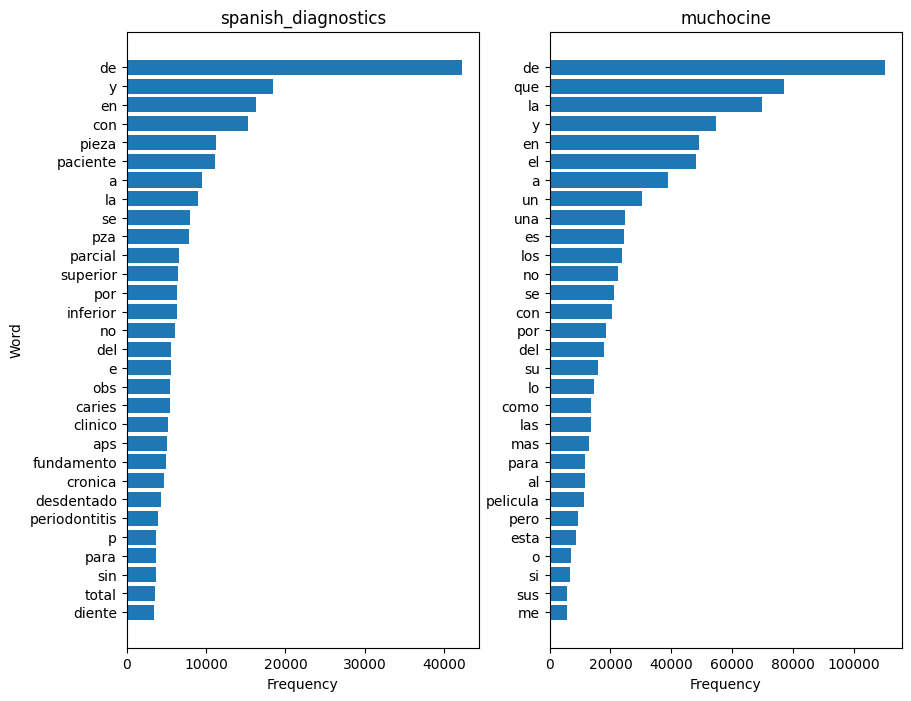

In [144]:
fig, axs = plt.subplots(ncols = 2, figsize = (10,8))
axs[0].barh(
    [word for word,f in spanish_diagnostics_words_top_words],
    [f for word,f in spanish_diagnostics_words_top_words],
)
axs[1].barh(
    [word for word,f in muchocine_words_top_words],
    [f for word,f in muchocine_words_top_words]
)
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].set_title("spanish_diagnostics")
axs[1].set_title("muchocine")
axs[0].set_ylabel("Word")
axs[0].set_xlabel("Frequency")
axs[1].set_xlabel("Frequency")
plt.show()

Para poder visualizar de mejor manera esta característica podemos visualizar las frecuencias con un gráfico de línea sobre unos ejes en escala logarítmica.

In [145]:
spanish_diagnostics_count=[count for word,count in spanish_diagnostics_words.most_common()]
muchocine_count=[count for word,count in muchocine_words.most_common()]

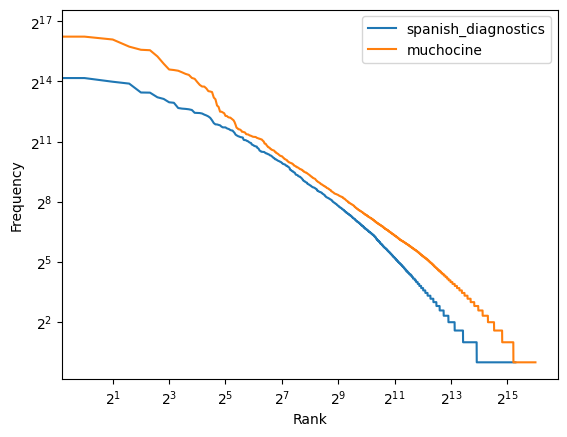

In [146]:
plt.plot(spanish_diagnostics_count, label = "spanish_diagnostics")
plt.plot(muchocine_count, label = "muchocine")
plt.yscale("log", base=2)
plt.xscale("log", base=2)
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.legend()
plt.show()

Una de las visualizaciones de corpora más utilizadas es el Word CLoud, la cual es una representación de la frecuencia (u otra métrica asociada) de las palabras mediante el tamaño de las mismas sobre un lienzo.

Instanciamos un objeto de la clase wordcloud.WordCloud con los parámetros de la visualización.

In [147]:
wc = WordCloud( # Objeto de WordCloud
    background_color = "white", # El fondo de la visualización es blanco
    colormap = "Blues" # Las palabras tendrán color azul
)

Nos podemos dar cuenta que hay palabras que tienen un tamaño muy grande (o frecuencia muy alta) pero que no nos ayudan a entender el contenido de los corpora. A estas palabras se les denomina stopwords y típicamente se las elimina para poder realizar nuestro análisis.

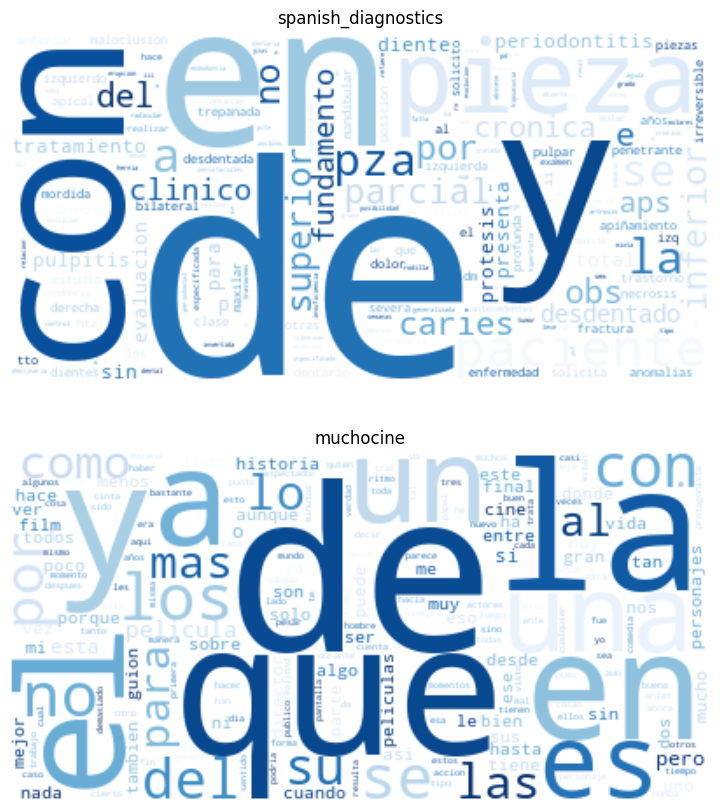

In [148]:
fig, axs = plt.subplots(nrows = 2, figsize = (10,10))
axs[0].imshow(wc.generate_from_frequencies(spanish_diagnostics_words), interpolation="bilinear") # Creamos el wordcloud desde las frecuencias de las palabras
axs[1].imshow(wc.generate_from_frequencies(muchocine_words), interpolation="bilinear")
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("spanish_diagnostics")
axs[1].set_title("muchocine")
plt.show()

Existen listas de stopwords típicas en algunas bibliotecas de procesamiento de lenguaje natural.

In [149]:
stopwords = spacy.lang.es.stop_words.STOP_WORDS # La biblioteca Spacy tiene una lista de stopwords en español

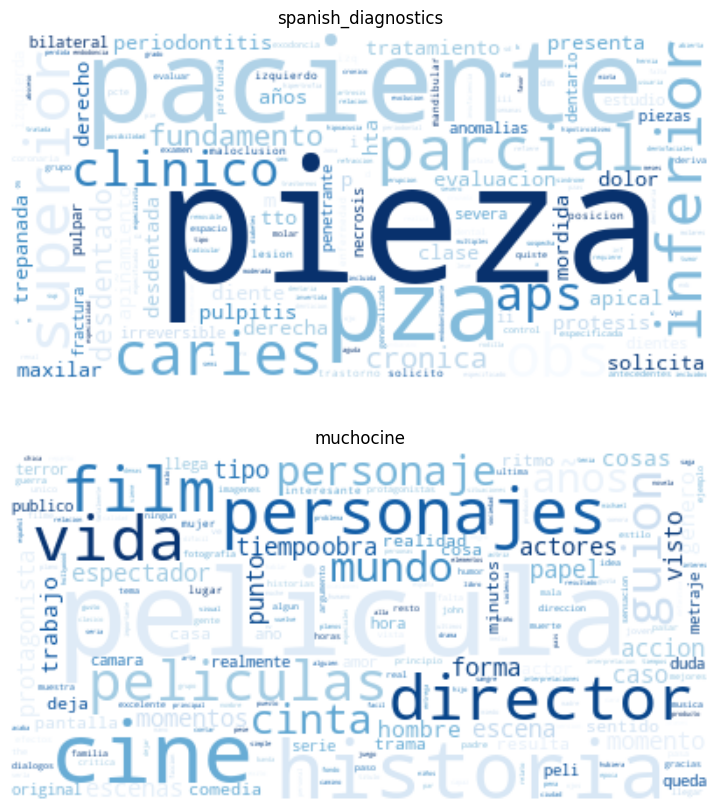

In [150]:
fig, axs = plt.subplots(nrows = 2, figsize = (10,10))
axs[0].imshow(wc.generate_from_frequencies(
    {word:f for word, f in spanish_diagnostics_words.items() if not word in stopwords} # Acá eliminamos las stopwords
), interpolation="bilinear")
axs[1].imshow(wc.generate_from_frequencies(
    {word:f for word, f in muchocine_words.items() if not word in stopwords}
), interpolation="bilinear")
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("spanish_diagnostics")
axs[1].set_title("muchocine")
plt.show()

Si bien una lista de stopwords es normalemnte suficiente para limpiar el texto también podemos extender nuestra lista con palabras que nosotros consideremos.

In [151]:
stopwords_extended = list(stopwords) + [ # Agregamos estas palabras que nos están ensuciando la visualización
    "pelicula",
    "paciente"
]

Ahora con nuestros corpora limpios podemos visualizar fácilmente el contenido de nuestros corpora. En el corpus spanish_diagnostics claramente vemos que las palabras más importantes en la visualización son las relacionadas a salud y en el corpus muchocine son palabras relacionadas al cine.

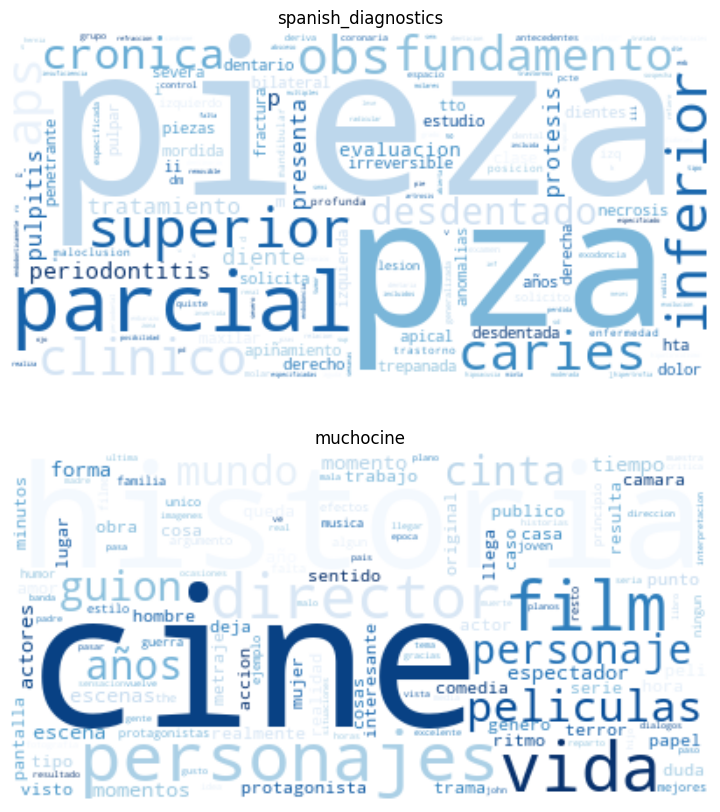

In [152]:
fig, axs = plt.subplots(nrows = 2, figsize = (10,10))
axs[0].imshow(wc.generate_from_frequencies(
    {word:f for word, f in spanish_diagnostics_words.items() if not word in stopwords_extended}
), interpolation="bilinear")
axs[1].imshow(wc.generate_from_frequencies(
    {word:f for word, f in muchocine_words.items() if not word in stopwords_extended}
), interpolation="bilinear")
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("spanish_diagnostics")
axs[1].set_title("muchocine")
plt.show()

Para poder enriquecer nuestra visualización podemos agregar máscaras a nuestras nubes y así comunicar mejor la información.

In [153]:
# Importamos las imágenes que utilizaremos como máscaras.
red_cross = np.array(PIL.Image.open("../data/red_cross.png"))
play_pause = np.array(PIL.Image.open("../data/play_pause.png"))

In [154]:
# Instanciamos un objeto por cada uno de nuestros corpora
wc_spanish_diagnostics = WordCloud(
    background_color = "white",
    colormap = "Reds",
    mask = red_cross,
    contour_width=3,
    contour_color='red'
)
wc_muchocine = WordCloud(
    background_color = "white",
    colormap = "Blues",
    mask = play_pause,
    contour_width=3,
    contour_color='blue'
)

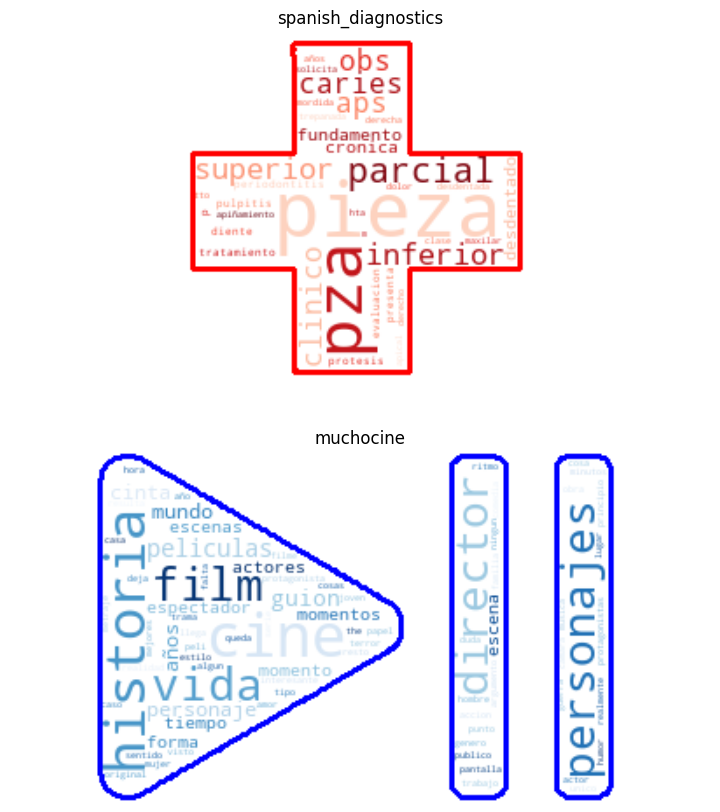

In [155]:
fig, axs = plt.subplots(nrows = 2, figsize = (10,10))
axs[0].imshow(wc_spanish_diagnostics.generate_from_frequencies(
    {word:f for word, f in spanish_diagnostics_words.items() if not word in stopwords_extended}
), interpolation="bilinear")
axs[1].imshow(wc_muchocine.generate_from_frequencies(
    {word:f for word, f in muchocine_words.items() if not word in stopwords_extended}
), interpolation="bilinear")
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("spanish_diagnostics")
axs[1].set_title("muchocine")
plt.show()

# Extra: bi-gramas, n-gramas

Una forma de tomar en cuenta estas colocaciones es mediante la utilización de bigramas, los cuales son pares de palabras.


In [156]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import pandas as pd
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [157]:
def n_grams(corpus,stop_words=None,n=20):
    unigrams = get_top_ngrams(corpus, (1, 1), stop_words, n)
    bigrams = get_top_ngrams(corpus, (2, 2), stop_words, n)
    trigrams = get_top_ngrams(corpus, (3, 3), stop_words, n)

    colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']
    plt.figure(figsize=(8, 10))
    sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
    plt.title('Top 20 Unigramas', size=15)
    plt.show()

    plt.figure(figsize=(8, 10))
    sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
    plt.title('Top 20 Bigramas', size=15)
    plt.show()

    plt.figure(figsize=(8, 10))
    sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
    plt.title('Top 20 Trigramas', size=15)
    plt.show()

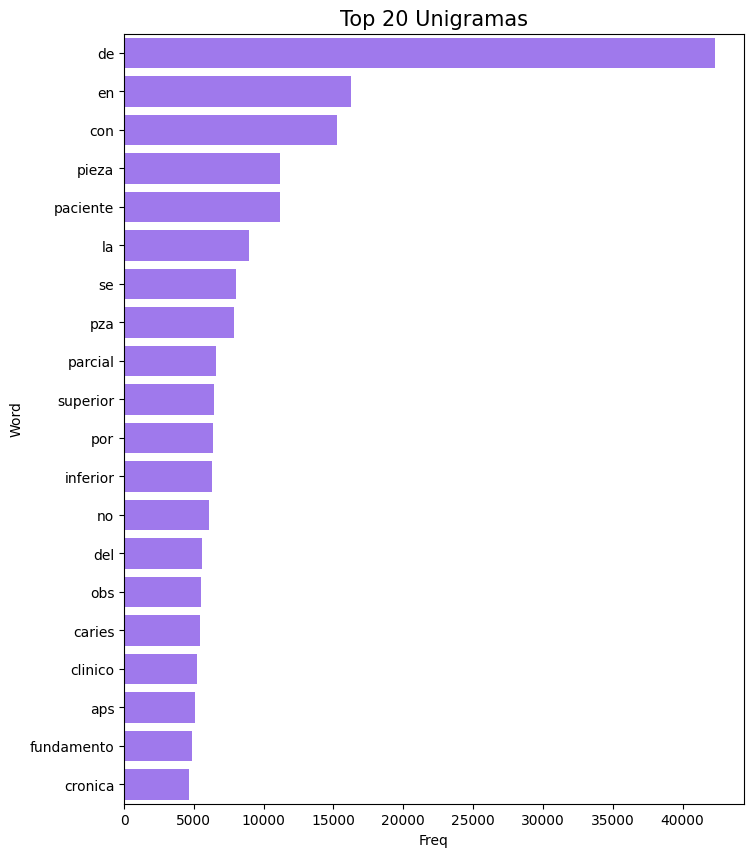

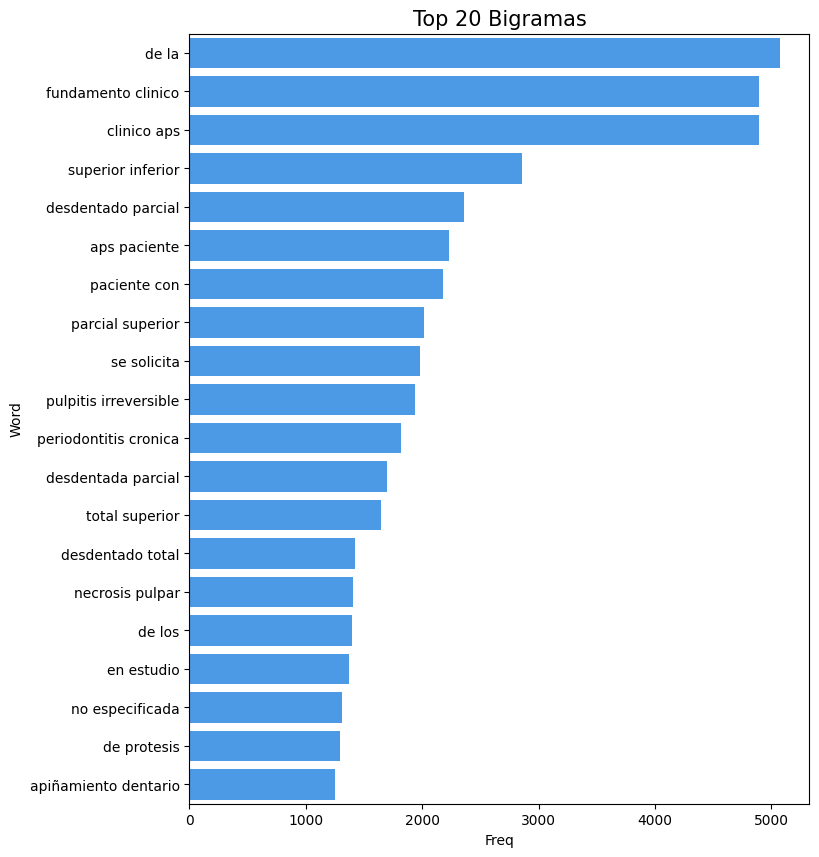

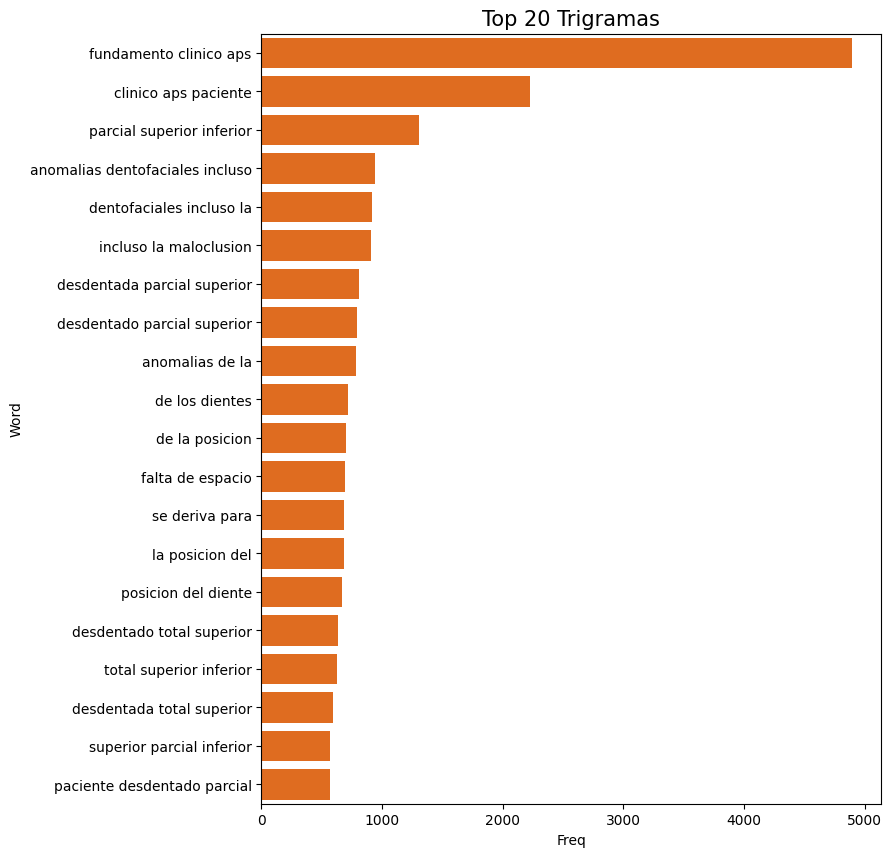

In [158]:
n_grams(spanish_diagnostics_normalized_tokenized["normalized_text"])

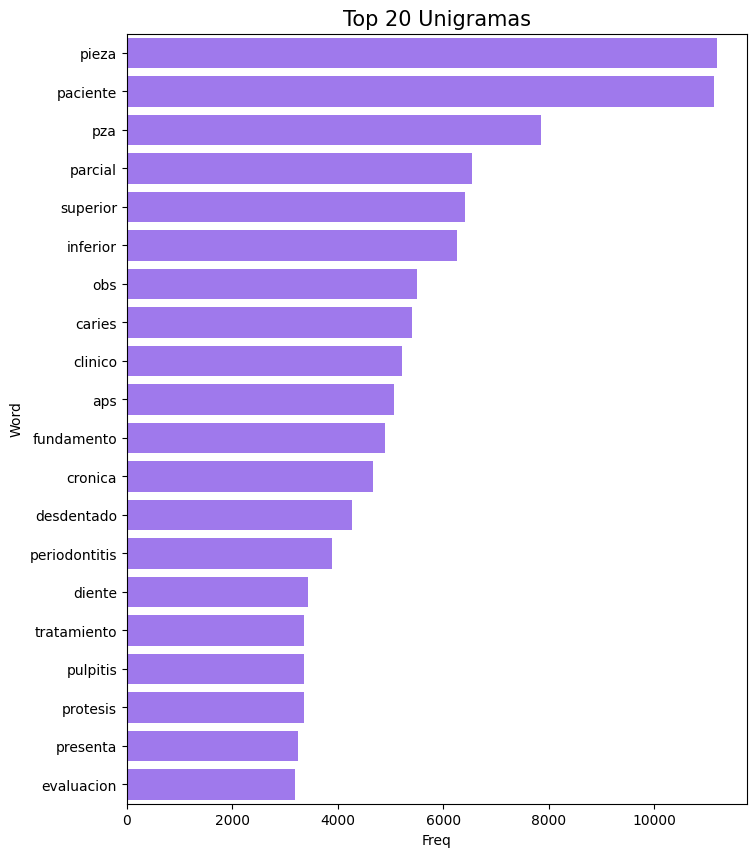

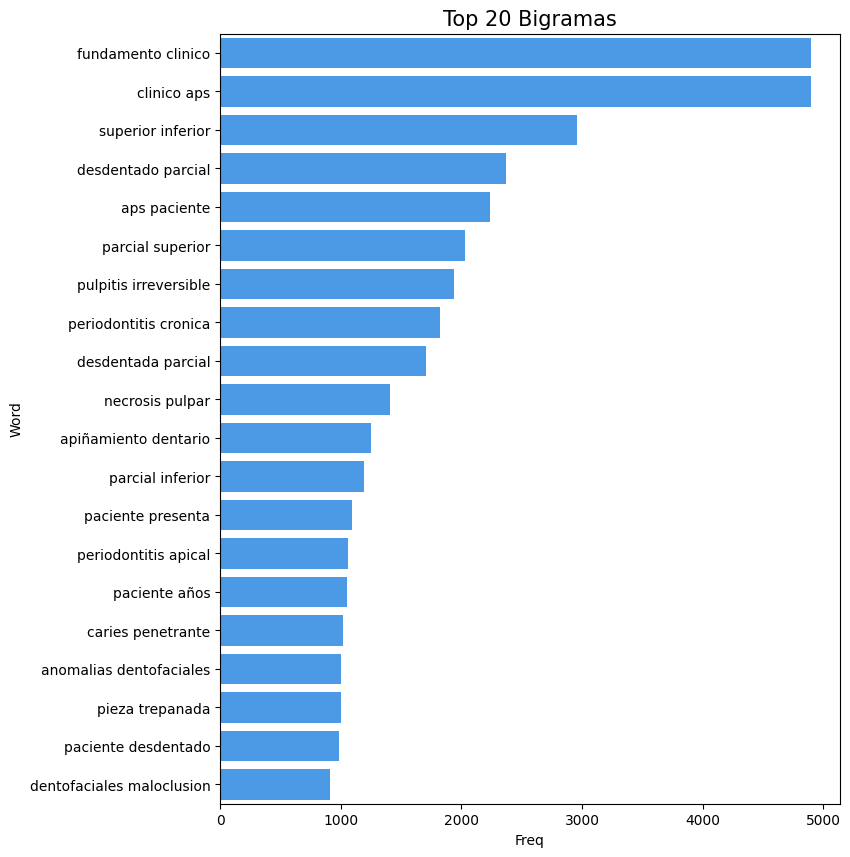

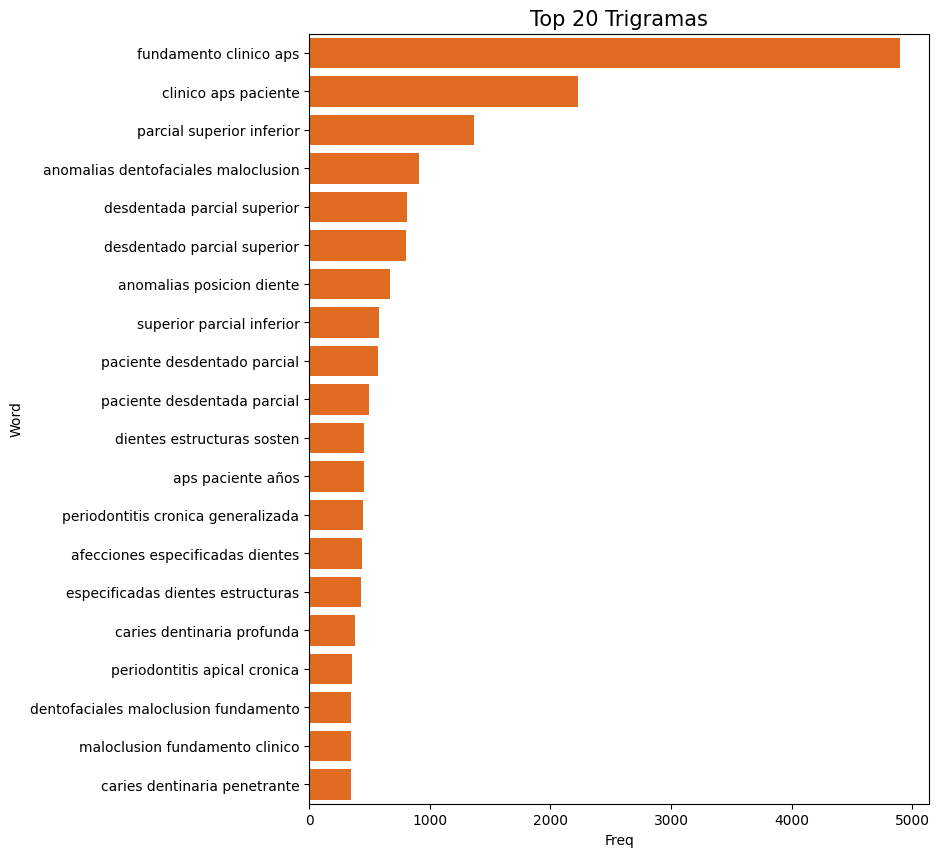

In [159]:
n_grams(spanish_diagnostics_normalized_tokenized["normalized_text"],stop_words=list(stopwords))

In [1]:
n_grams(muchocine_normalized_tokenized["normalized_text"],stop_words=list(stopwords))

NameError: name 'n_grams' is not defined